In [100]:
from sklearn.datasets import load_diabetes

In [101]:
dataset=load_diabetes()

In [102]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [103]:
import pandas  as pd
X=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
y=dataset['target']

In [104]:
X
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [106]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()

In [107]:
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [108]:
# from sklearn.tree import DecisionTreeRegressor, plot_tree
# import matplotlib.pyplot as plt
# plt.figure(figsize=(15, 10))
# plot_tree(tree, filled=True)
# plt.show()

In [109]:
y_pred=tree.predict(X_test)

In [110]:
y_pred

array([109., 246., 273.,  73., 187., 141., 135., 263.,  39.,  72.,  72.,
       196.,  90., 168., 102., 259., 168.,  55., 311.,  87., 229., 336.,
        54., 336.,  74.,  85., 198., 214., 206.,  78., 242., 197.,  96.,
       158., 191., 116.,  63.,  70., 132., 164., 123., 118., 259., 153.,
        84., 134.,  90., 111., 281.,  25., 259., 190.,  55., 346., 275.,
        81., 135., 183., 198.,  73., 236.,  60., 200.,  64.,  97., 321.,
        90.,  75., 109., 200., 121.,  68.,  71.,  72., 121., 116., 232.,
       120.,  87., 134., 277., 111., 310., 246., 121.,  77., 214.,  84.,
        90., 196., 321.,  49., 321., 191.,  70.,  87., 182., 214.,  96.,
        63., 155., 311., 258., 170., 115., 252.,  52., 180., 219.,  79.,
       110.,  96.,  97.,  70.,  97.,  95., 232.,  96., 118., 195., 263.,
       245., 109., 200.,  91., 167., 173., 111., 199.,  54., 160.,  73.,
       265.])

In [111]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

-0.19384692460140385


In [112]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [113]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
regressor=DecisionTreeRegressor()

In [116]:
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [117]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [118]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [119]:
## predictions
y_pred=grid.predict(X_test)

In [120]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [121]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.2771213835259707
55.89040722336997
4574.1381266785775


In [122]:
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')

In [123]:
selectedmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.6, 0.9, 'x[2] <= 0.072\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.4, 0.7, 'x[8] <= -0.011\nfriedman_mse = 5011.195\nsamples = 292\nvalue = 145.702'),
 Text(0.5, 0.8, 'True  '),
 Text(0.2, 0.5, 'x[6] <= 0.032\nfriedman_mse = 2718.389\nsamples = 130\nvalue = 106.777'),
 Text(0.1, 0.3, 'x[1] <= -0.013\nfriedman_mse = 3252.317\nsamples = 86\nvalue = 116.721'),
 Text(0.05, 0.1, 'friedman_mse = 3553.785\nsamples = 46\nvalue = 124.674'),
 Text(0.15, 0.1, 'friedman_mse = 2749.244\nsamples = 40\nvalue = 107.575'),
 Text(0.3, 0.3, 'x[1] <= 0.006\nfriedman_mse = 1103.77\nsamples = 44\nvalue = 87.341'),
 Text(0.25, 0.1, 'friedman_mse = 1111.705\nsamples = 37\nvalue = 91.568'),
 Text(0.35, 0.1, 'friedman_mse = 468.286\nsamples = 7\nvalue = 65.0'),
 Text(0.6, 0.5, 'x[7] <= 0.072\nfriedman_mse = 4659.527\nsamples = 162\nvalue = 176.938'),
 Text(0.5, 0.3, 'x[2] <= 0.022\nfriedman_mse = 4634.083\nsamples = 146\nvalue = 173.445'),
 Text(0.45, 0.1, 'friedman_mse = 4187.88

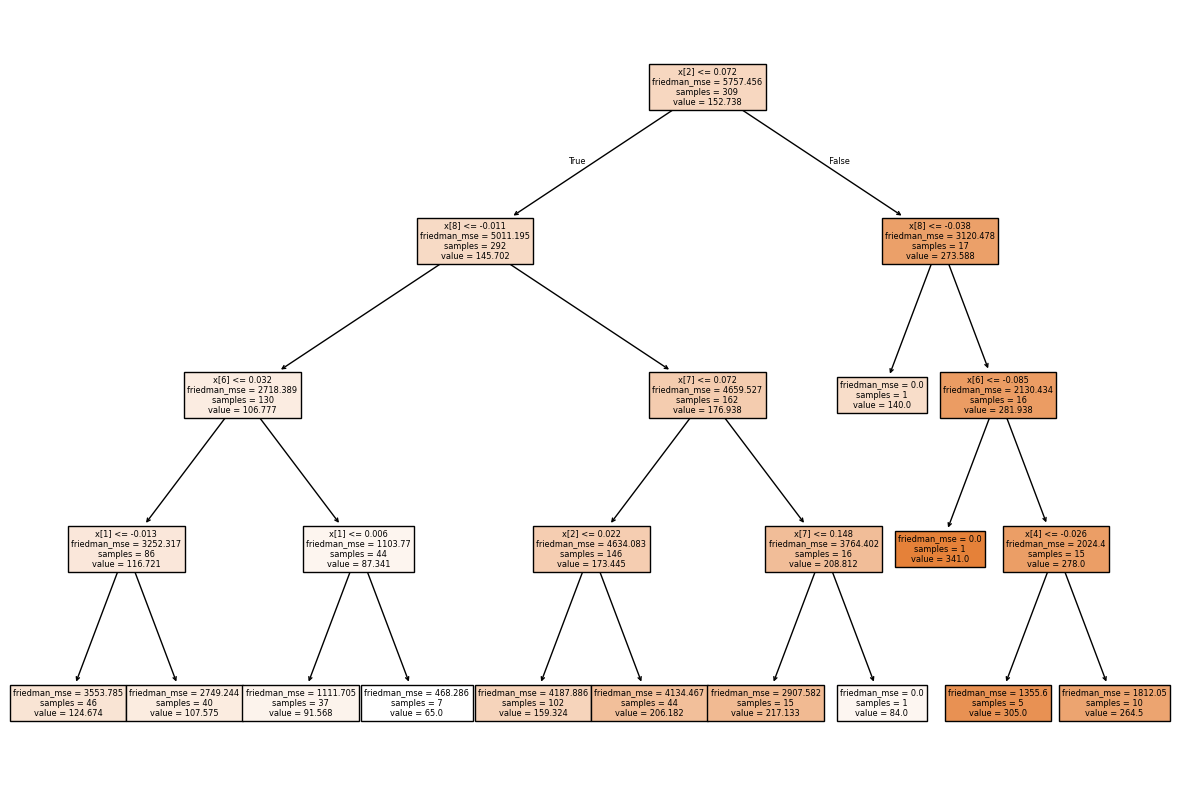

In [124]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)